In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
training = pd.read_csv('https://raw.githubusercontent.com/ashans/titanic-survivor-prediction/main/train.csv')
testing = pd.read_csv('https://raw.githubusercontent.com/ashans/titanic-survivor-prediction/main/test.csv')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
training.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S


In [8]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
# Ticket was not considered
df_cat = training[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]
df_cat['Cabin'] = df_cat['Cabin'].apply(lambda x: str(x)[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


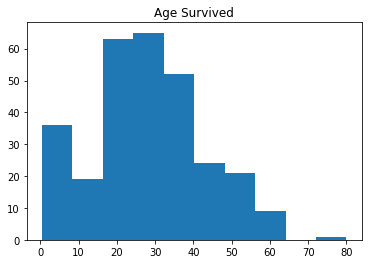

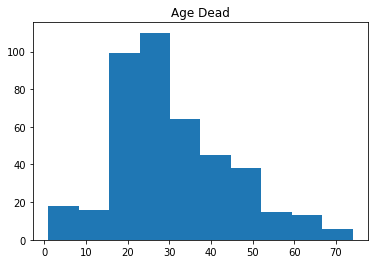

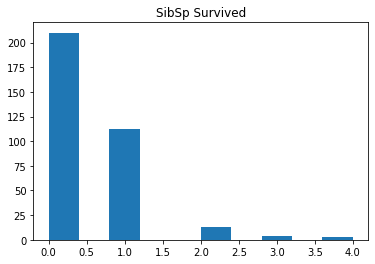

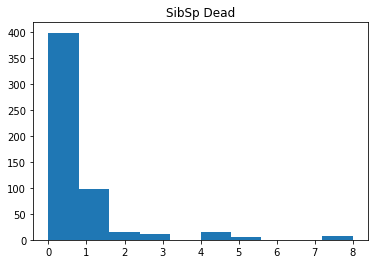

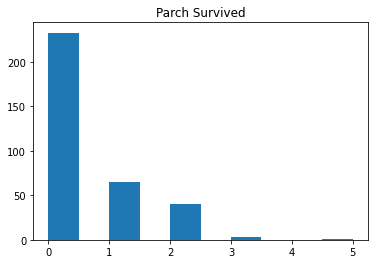

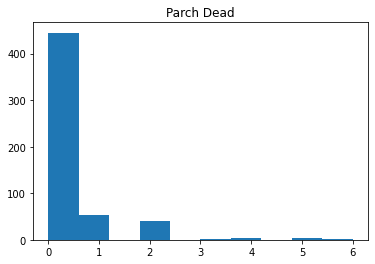

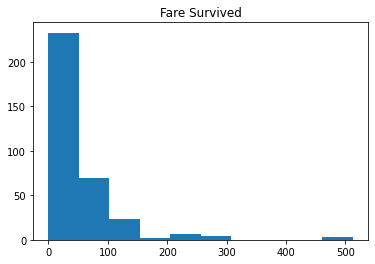

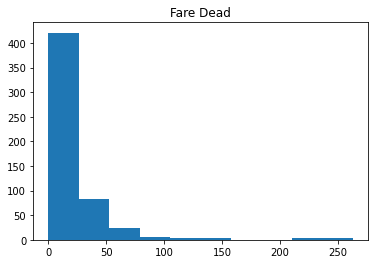

In [9]:
for i in df_num:
    plt.hist(df_num[training['Survived'] == 1][i])
    plt.title(i + " Survived")
    plt.show()
    plt.hist(df_num[training['Survived'] == 0][i])
    plt.title(i + " Dead")
    plt.show()

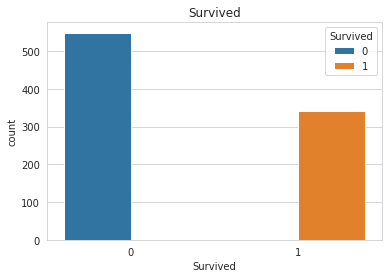

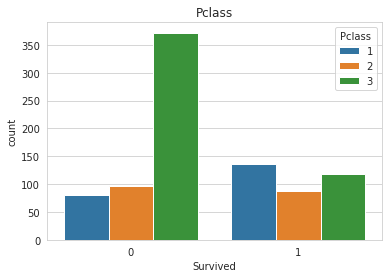

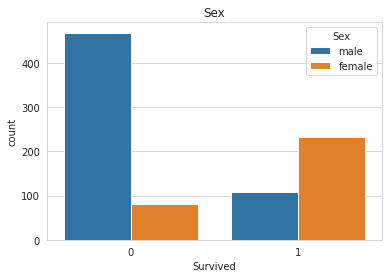

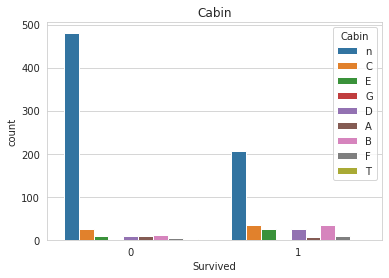

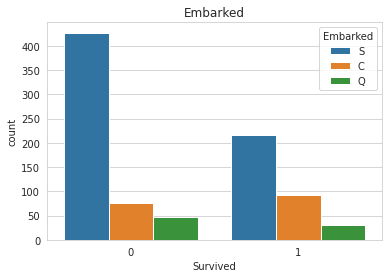

In [10]:
sns.set_style("whitegrid")
for i in df_cat:
    sns.countplot(x=df_cat["Survived"],hue=i,data=df_cat)
    plt.title(i)
    plt.show()

In [11]:
def preprocess(data):
    processed = data.drop(["PassengerId","Name","Ticket","Fare"],axis=1)
    processed['Cabin'] = processed['Cabin'].fillna('N').apply(lambda x: 0 if str(x) == 'N' else 1)
    processed['Age'] = processed["Age"].fillna(processed['Age'].mean())
    processed["Sex"]=processed.Sex.map({"male":1,"female":0})
    processed['Embarked'] = processed['Embarked'].fillna('S')
    dummy = pd.get_dummies(processed['Embarked'],drop_first=True)
    processed.drop('Embarked',axis = 1 ,inplace=True)
    processed = pd.concat([dummy , processed],axis = 1 )
    return processed

In [12]:
p_train = preprocess(training)
p_test = preprocess(testing)

In [13]:
x=p_train.drop("Survived",axis=1)
y=p_train.Survived

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

kf = KFold(n_splits=10, random_state=None)

precisions = []
recalls = []
f1s = []

for train_index , test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model=GaussianNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    precisions.append(precision_score(y_test, y_pred, labels=[1]))
    recalls.append(recall_score(y_test, y_pred, labels=[1]))
    f1s.append(f1_score(y_test, y_pred, labels=[1]))

precision = sum(precisions)/10
recall = sum(recalls)/10
f1 = sum(f1s)/10

print(f'Precision - {precision}, Recall - {recall}, F1 - {f1}')

Precision - 0.6688534499636092, Recall - 0.787976559961854, F1 - 0.7200468353816719


In [15]:
model_full=GaussianNB()
model_full.fit(x,y)
y_pred_full=model_full.predict(p_test)

In [16]:
sub=pd.read_csv("https://raw.githubusercontent.com/ashans/titanic-survivor-prediction/main/gender_submission.csv")
sub["Survived"]=y_pred_full

In [17]:
sub.to_csv("submission.csv",index=False)